#### Demo for generating the focal maps in multiple scanns

In [1]:
# import the necessary packages
import imutils
import matplotlib.pyplot as plt

import os
import numpy as np
from scipy import ndimage
from tqdm import tqdm  # ! this might result into problem with 'object'
import pandas as pd
import random
import glob
from skimage import io

import argparse
import time
import cv2

In [65]:
# test1 = 'stdMap.npy'
# test2 = 'stdMap' + str(STEP) + '.npy'

In [66]:
# for one scann of the image

def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    stdMap = np.zeros((image.shape[:2]))  # careful the image is 3 channels
    
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])
            tPatch = image[y:y + windowSize[1], x:x + windowSize[0], 0]  # taking only 1 channel from 3
            tempStdPatch = np.ones((tPatch.shape)) * np.std((tPatch))
            # print(tempStdPatch)
            stdMap[y:y + windowSize[1], x:x + windowSize[0]] = tempStdPatch + stdMap[y:y + windowSize[1], x:x + windowSize[0]] 
            # print(tempStd)
    np.save('stdMap'+str(stepSize)+'.npy', stdMap)
#     return stdMap

In [ ]:
# define the visualization of the images

def visualizeSlide(image, stepSize, windowSize):
    
    # slide window scanning for one test
    for (x, y, window) in sliding_window(image, stepSize=STEP, windowSize=(winW, winH)):
        # if the window does not meet our desired window size, ignore it
        if window.shape[0] != winH or window.shape[1] != winW:
            continue
        # draw the window during the process
        clone = image.copy() 
        cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)  # third param indicates the colour
        cv2.imshow("Window", clone)
        cv2.waitKey(1)
           # time.sleep(0.025)
        time.sleep(0.0025)
    cv2.destroyAllWindows()  # destroy the window after showing

In [10]:
# multiple scans
def slidingStack(image, stepArray, windowSize):
    
    focalStack = []
    
    for i in range(len(stepArray)):
        
        stepSize = stepArray[i]
        # slide a window across the image
        stdMap = np.zeros((image.shape[:2]))  # careful the image is 3 channels

        for y in range(0, image.shape[0], stepSize):
            for x in range(0, image.shape[1], stepSize):
                # yield the current window
                yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])
                tPatch = image[y:y + windowSize[1], x:x + windowSize[0], 0]  # taking only 1 channel from 3
                tempStdPatch = np.ones((tPatch.shape)) * np.std((tPatch))
                # print(tempStdPatch)
                stdMap[y:y + windowSize[1], x:x + windowSize[0]] = tempStdPatch + stdMap[y:y + windowSize[1], x:x + windowSize[0]] 
                # print(tempStd)
        focalStack.append(stdMap)
        
        # calculate the stack and conduct max projection
    fMax = np.max(np.asarray(focalStack), axis=0)
    np.save('fMaxStack.npy', fMax)
        

In [11]:
def visualizeStack(image, stepArray, windowSize):
    
    # slide window scanning for one test
    for (x, y, window) in slidingStack(image, stepArray=stepArray, windowSize=(winW, winH)):
        # if the window does not meet our desired window size, ignore it
        if window.shape[0] != winH or window.shape[1] != winW:
            continue
        # draw the window during the process
        clone = image.copy() 
        cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)  # third param indicates the colour
        cv2.imshow("Window", clone)
        cv2.waitKey(1)
           # time.sleep(0.025)
        time.sleep(0.00025)
    cv2.destroyAllWindows() 

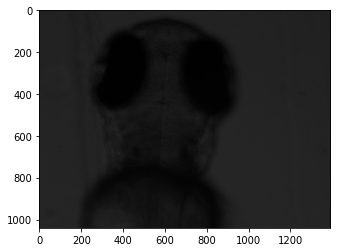

In [4]:
# read in the image
image = np.load('F:/LM/digitalConfocal/notebooks/testIMG.npy')

# sorting out the image
image = np.stack((image,)*3, axis=-1)  # remember the operation is on 3 channels
plt.imshow(image, cmap='gray')


In [16]:
(winW, winH) = (128, 128)
# (winW, winH) = (256, 128)
# (winW, winH) = (512, 512)
# STEP = 64

In [55]:
# process the image. get the focal map

# test1 = sliding_window(image=image, stepSize=STEP, windowSize=(winW, winH))  # calculate the focal map
# 单个的显示并不能直接计算得到结果


In [56]:
# visualize one slide scann

visualizeSlide(image=image, stepSize=STEP, windowSize=(winW, winH))  # visualize the window

In [58]:
cv2.destroyAllWindows()

In [17]:
# testing the multi scans

stepArray = [8, 16, 32, 64, 128]

visualizeStack(image, stepArray=stepArray, windowSize=(winW, winH))

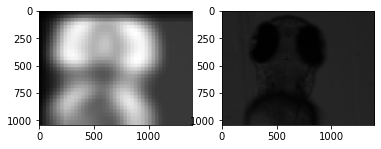

In [18]:
# compare the results with original pic

tempScan =  np.load('stdMap.npy')

plt.subplot(1,2,1)
plt.imshow(tempScan, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(image, cmap='gray')
plt.show()